In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# first, we'll create a simple numpy array
our_array = np.arange(16)

In [3]:
our_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [4]:
# next, we'll reshape it -- this is a 2D array, which is unique in Python
our_array = our_array.reshape(4, 4) # we'll make it a 4X4 array
our_array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [5]:
# it's easy to perform a lot of different operations on numpy arrays that you can't do in normal Python
our_array * 4 # multiply every item by 4 all at once

array([[ 0,  4,  8, 12],
       [16, 20, 24, 28],
       [32, 36, 40, 44],
       [48, 52, 56, 60]])

In [6]:
# we can also easily multiple arrays by each other
our_array * our_array

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121],
       [144, 169, 196, 225]])

In [11]:
# here we'll load a dataframe from a csv file
df = pd.read_csv('https://raw.githubusercontent.com/JonathanBechtel/data/master/boston.csv')
df.drop(df.columns[0], axis=1, inplace=True)
# the head gives us the first 5 rows in the dataframe
df.head(10)

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,6.575,4.0900,296.0,15.3,4.98,24.0
1,0.02731,6.421,4.9671,242.0,17.8,9.14,21.6
2,0.02729,7.185,4.9671,242.0,17.8,4.03,34.7
3,0.03237,6.998,6.0622,222.0,18.7,2.94,33.4
4,0.06905,7.147,6.0622,222.0,18.7,5.33,36.2
5,0.02985,6.430,6.0622,222.0,18.7,5.21,28.7
6,0.08829,6.012,5.5605,311.0,15.2,12.43,22.9
7,0.14455,6.172,5.9505,311.0,15.2,19.15,27.1
8,0.21124,5.631,6.0821,311.0,15.2,29.93,16.5
9,0.17004,6.004,6.5921,311.0,15.2,17.10,18.9


In [12]:
# pull descriptive statistics on each of our columns
df.describe()

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,6.284634,3.795043,408.237154,18.455534,12.653063,22.532806
std,8.596783,0.702617,2.105710,168.537116,2.164946,7.141062,9.197104
min,0.006320,3.561000,1.129600,187.000000,12.600000,1.730000,5.000000
25%,0.082045,5.885500,2.100175,279.000000,17.400000,6.950000,17.025000
50%,0.256510,6.208500,3.207450,330.000000,19.050000,11.360000,21.200000
75%,3.647422,6.623500,5.188425,666.000000,20.200000,16.955000,25.000000
max,88.976200,8.780000,12.126500,711.000000,22.000000,37.970000,50.000000


In [15]:
# get info about the data types and number of entries for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
CRIM       506 non-null float64
RM         506 non-null float64
DIS        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(7)
memory usage: 27.8 KB


In [10]:
# find out how many missing values we have
df.isnull().sum()

CRIM       0
RM         0
DIS        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

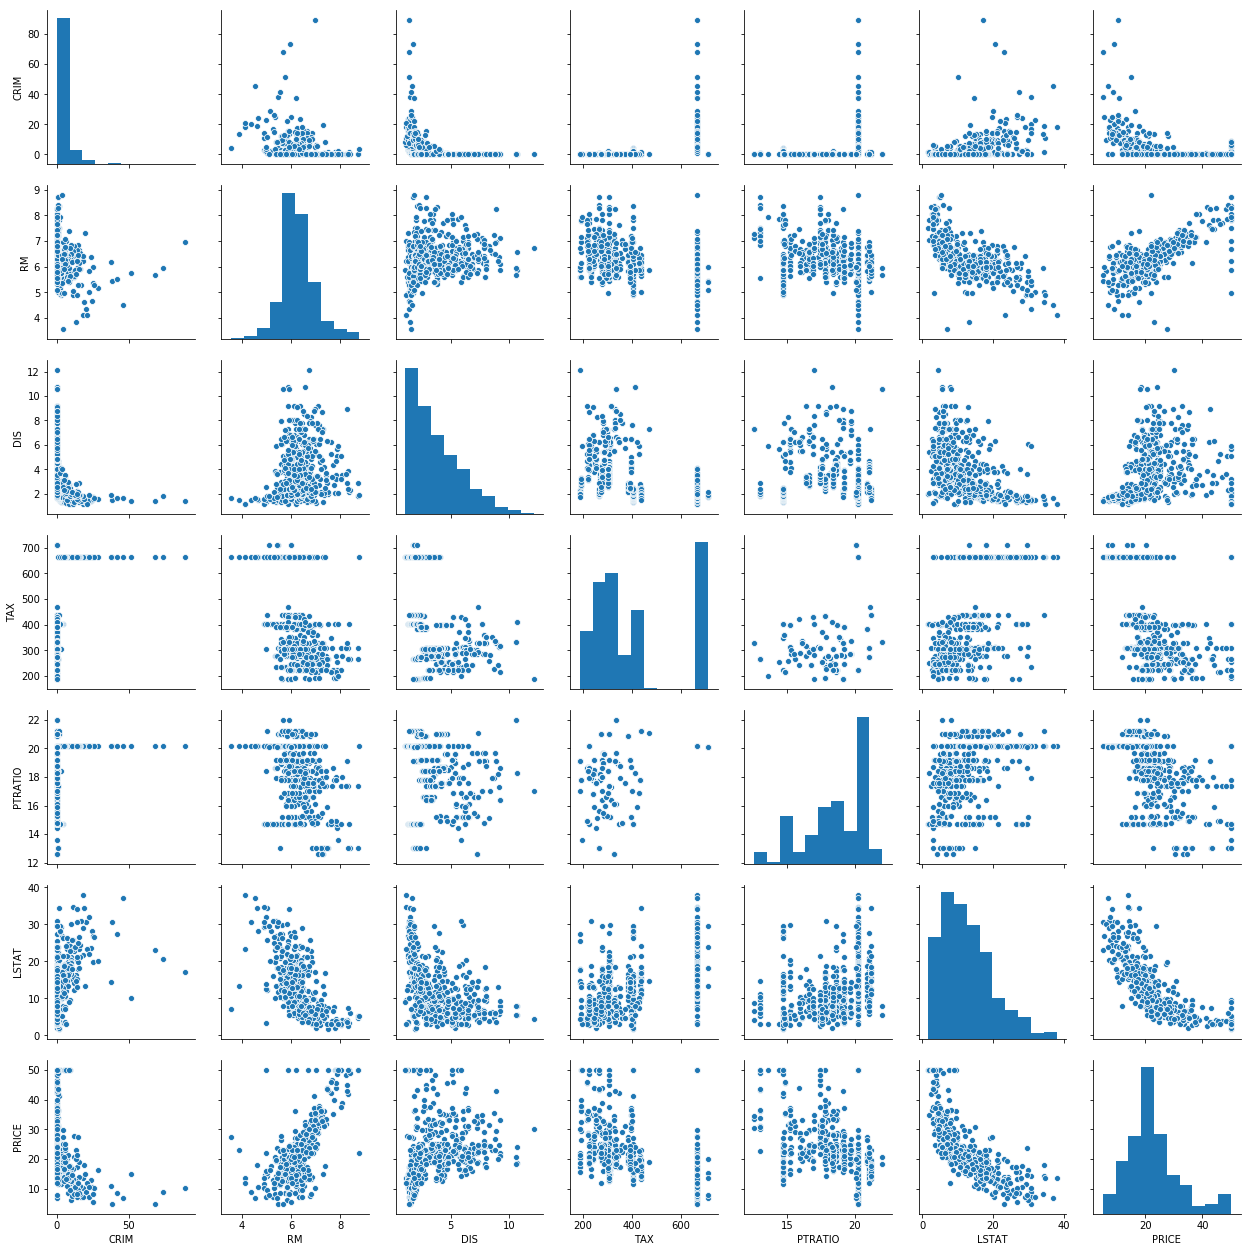

In [11]:
# we can also use matplotlib and seaborn to quickly create different visuals
sns.pairplot(df)

In [18]:
# next, we'll use our dataframe to implement a linear model with scikit learn
model = LinearRegression(n_jobs=-1)
X = df[['CRIM', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['PRICE']
model.fit(X, y) # here we're training the model on the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
df['PREDICTION'] = model.predict(X) # we're creating a new column with the predictions from our data
df.head()

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE,PREDICTION
0,0.00632,6.575,4.0900,296.0,15.3,4.98,24.0,31.599791
1,0.02731,6.421,4.9671,242.0,17.8,9.14,21.6,25.894074
2,0.02729,7.185,4.9671,242.0,17.8,4.03,34.7,32.331011
3,0.03237,6.998,6.0622,222.0,18.7,2.94,33.4,30.724363
4,0.06905,7.147,6.0622,222.0,18.7,5.33,36.2,29.923519


In [15]:
df['Error'] = df['PRICE'] - df['PREDICTION'] # this column is the difference between the Price and Prediction -- the Error
df.head()

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE,PREDICTION,Error
0,0.00632,6.575,4.0900,296.0,15.3,4.98,24.0,31.599791,-7.599791
1,0.02731,6.421,4.9671,242.0,17.8,9.14,21.6,25.894074,-4.294074
2,0.02729,7.185,4.9671,242.0,17.8,4.03,34.7,32.331011,2.368989
3,0.03237,6.998,6.0622,222.0,18.7,2.94,33.4,30.724363,2.675637
4,0.06905,7.147,6.0622,222.0,18.7,5.33,36.2,29.923519,6.276481


In [16]:
# We can now use this to see what the importance of different features are
model.coef_ # this stores the coefficient values for each of our variables

array([-6.39310737e-02,  4.36892861e+00, -7.05170927e-01, -4.08986051e-03,
       -8.44392610e-01, -6.06472351e-01])

In [17]:
# now let's put this in a more readable form
coefficients = pd.DataFrame({'Variable':    df.columns[0:6],
                             'Weight': model.coef_
                            }).sort_values(by='Weight')

In [18]:
coefficients.head(6)

,Variable,Weight
4,PTRATIO,-0.844393
2,DIS,-0.705171
5,LSTAT,-0.606472
0,CRIM,-0.063931
3,TAX,-0.004090
1,RM,4.368929


<BarContainer object of 6 artists>

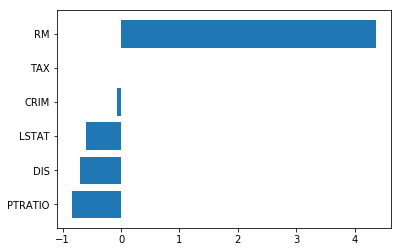

In [19]:
plt.barh(coefficients.Variable, coefficients.Weight)

C:\Users\Jonat\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


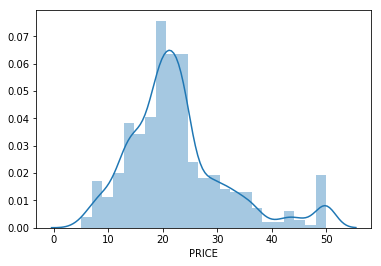

In [20]:
sns.distplot(df['PRICE'])

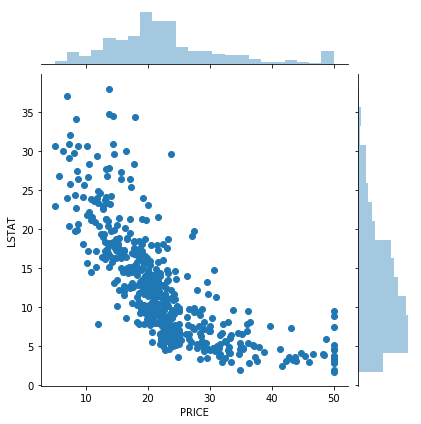

In [21]:
sns.jointplot(x='PRICE', y='LSTAT', data=df)

In [28]:
np.linalg.inv(X_int.T @ X_int) @ X_int.T @ y[:, np.newaxis]

array([[ 2.29086763e+01],
       [-6.39310737e-02],
       [ 4.36892861e+00],
       [-7.05170927e-01],
       [-4.08986051e-03],
       [-8.44392610e-01],
       [-6.06472351e-01]])

In [24]:
X_int = np.c_[np.ones(X.shape[0]), X]

In [25]:
X_int.shape

(506, 7)

In [27]:
X_int[:10]

array([[1.0000e+00, 6.3200e-03, 6.5750e+00, 4.0900e+00, 2.9600e+02,
        1.5300e+01, 4.9800e+00],
       [1.0000e+00, 2.7310e-02, 6.4210e+00, 4.9671e+00, 2.4200e+02,
        1.7800e+01, 9.1400e+00],
       [1.0000e+00, 2.7290e-02, 7.1850e+00, 4.9671e+00, 2.4200e+02,
        1.7800e+01, 4.0300e+00],
       [1.0000e+00, 3.2370e-02, 6.9980e+00, 6.0622e+00, 2.2200e+02,
        1.8700e+01, 2.9400e+00],
       [1.0000e+00, 6.9050e-02, 7.1470e+00, 6.0622e+00, 2.2200e+02,
        1.8700e+01, 5.3300e+00],
       [1.0000e+00, 2.9850e-02, 6.4300e+00, 6.0622e+00, 2.2200e+02,
        1.8700e+01, 5.2100e+00],
       [1.0000e+00, 8.8290e-02, 6.0120e+00, 5.5605e+00, 3.1100e+02,
        1.5200e+01, 1.2430e+01],
       [1.0000e+00, 1.4455e-01, 6.1720e+00, 5.9505e+00, 3.1100e+02,
        1.5200e+01, 1.9150e+01],
       [1.0000e+00, 2.1124e-01, 5.6310e+00, 6.0821e+00, 3.1100e+02,
        1.5200e+01, 2.9930e+01],
       [1.0000e+00, 1.7004e-01, 6.0040e+00, 6.5921e+00, 3.1100e+02,
        1.5200e+01, 1.7